In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import time

# Plot $\ell$ and $\ell_{DW}$ as a function of time
Those are the two characteristic lenghts that are discussed in the proper Appendix of the Master thesis!

In [3]:
C=1
L = 512
dx = 0.1
dt = 0.001
t_init = 0
tspan = 5000
nloops = int(tspan/dt)
N = int(L/dx)

### $\ell(t)$ is the wave-lenght associated to the average momentum $<q^2>$

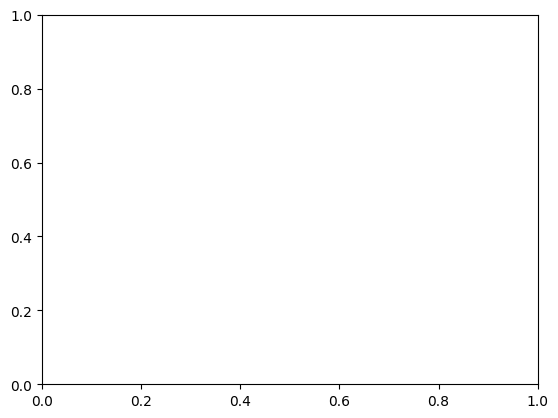

In [4]:
fig, ax = plt.subplots();

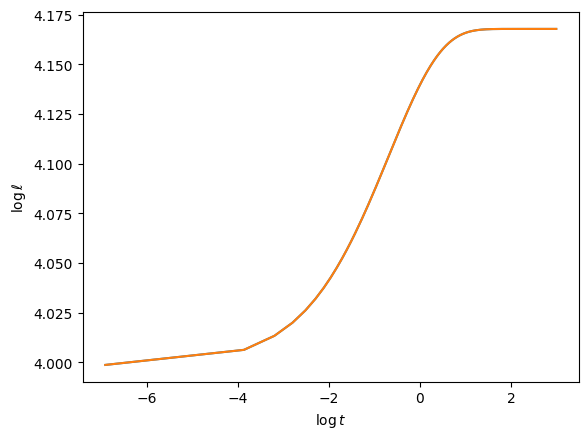

In [6]:
f = open("../fileq2Aveout.dat", "r")
nloops = 10000000
tt = np.zeros(nloops)
q2 = np.zeros(nloops)
lam = np.zeros(nloops)
i = 0
for row in f:
    a, b = row.split(" ")
    tt[i] = float(a) + t_init
    q2[i] = float(b)
    lam[i] = 2*np.pi/np.sqrt(q2[i])
    if i == 2:
        dt = tt[i] - tt[i-1]
    i = i + 1
tt = tt[0:i]
q2 = q2[0:i]
lam = lam[0:i]

# Calc logaritms (we'll plot the log)
log_tt = np.log(tt)
log_lam = np.log(lam)

ax.set_xscale("linear")
ax.set_yscale("linear")
ax.plot(log_tt, log_lam,'-',color="black")
ax.set_xlabel("$\log t$")
ax.set_ylabel("$\log \ell$")
# Plot fit line
#ax.axvline(np.log(12),color="black",label="change dt=1e-1")
#ax.axvline(np.log(4012),color="gray",label="change dt=5e-1")
#ax.plot(fit_xx, np.log(4*np.pi)*np.ones(len(fit_xx)) + 0.5*fit_xx,'--', label="Fit: $" + str(prefactor) + "\pi \cdot t^{" + str(exponent) + "}$")
#ax.set_xlim(0, 8)
#ax.legend()
#ax.grid()

fig

Power fitted: 0.02


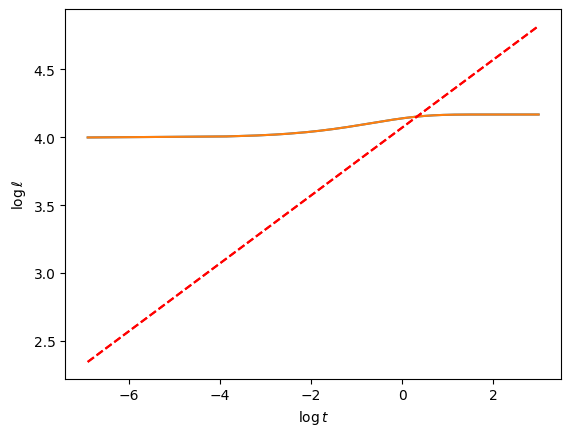

In [9]:
# Linear fit
imin = 1
imax = 8
c = np.polyfit(log_tt[imin:imax-1], log_lam[imin:imax-1], 1)
cifers = 2
exponent = round(c[0], cifers)
prefactor = round(np.exp(c[1])/np.pi,cifers)    #In units of pi !!!
# Fitted line
fit_xx = log_tt
fit_yy = c[1]*np.ones(len(fit_xx)) + c[0]*fit_xx
print("Power fitted: " + str(exponent))

# Now fit ONLY the prefactor
log_lam_new = log_lam - c[0]*fit_xx
c = np.polyfit(log_tt[imin:imax-1], log_lam_new[imin:imax-1], 0)
exponent = 0.25
prefactor = round(np.exp(c[0])/np.pi,cifers)    #In units of pi !!!
fit_yy = c[0]*np.ones(len(fit_xx)) + exponent*fit_xx

ax.plot(fit_xx,fit_yy,"--",color="red")
fig


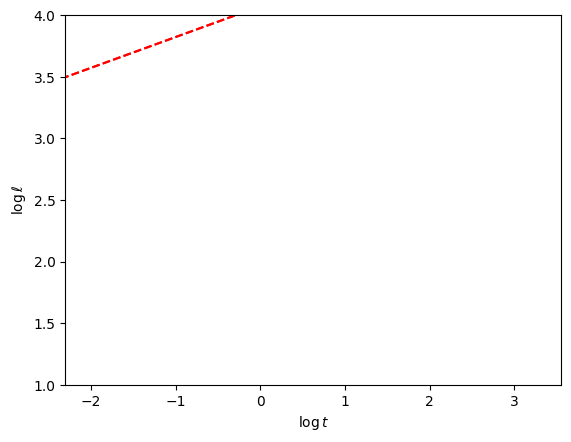

In [10]:
# Select only a specific xrange
ax.set_xlim(np.log(0.1),np.log(35))
ax.set_ylim(1,4)
ax.grid(0)
fig

### $\ell_{DW}(t)$ is the measure of the average size of the domains
To calculate this lenghts, we need to calculate two integrals called $I_1$ and $I_2$ in the thesis' Appendix.
So the following functions "Cfun, Wfun" are defined, as those integrals depend on C(t).
In fact, only one of those integrals has to be calculated and as it measures the thickness of the interface, it is called $W$.
**NOTICE** that _in the Appendix_ an **approximation** is made when we calculate this thickness, as we approximate u in the direction ortogonal to the interface as the 1D stationary state with C=C(t). But this is an approximation good only in the adiabatic (slow C(t)) limit.
While in the fast limit C=C0 is a good approximation and in the meanwhile BOH.


In [ ]:
def Cfun(t, T):
    return 1 + 0.25*np.sin(2*np.pi*t/T)
def Wfun(t,T):
    C = Cfun(t,T)
    return (2*np.sqrt(2)/3*np.power(C,3/2))
C = 1
W = (2*np.sqrt(2)/3*np.power(C,3/2))

Fit from t = 0.081
Power fitted: 8.15


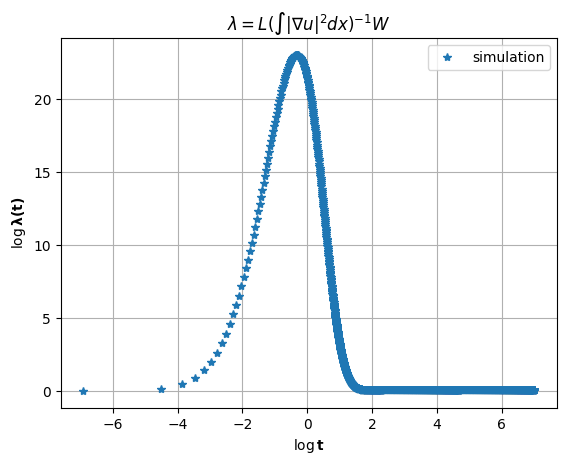

In [244]:
f = open("../filegrad2.dat", "r")
tt = np.zeros(nloops)
lamDW = np.zeros(nloops)
i = 0
for row in f:
    a, b = row.split(" ")
    tt[i] = float(a) + t_init
    #lam[i] = float(b)*Wfun(tt[i],T)
    lamDW[i] = float(b)*W
    if i == 2:
        dt = tt[i] - tt[i-1]
    i = i + 1
tt = tt[0:i]
tspan_title = "\n$t\in$[" + str(tt[0]) + ", " + str(tt[len(tt)-1]) + "]"
lamDW = lamDW[0:i]

# Select region to plot
#tmin = np.exp(3)
#tmax = 10000
#imin = int((tmin-tt[0])/dt)
#imax = int((tmax-tt[0])/dt)
imin = 8
imax = 100
print("Fit from t = " + str(tt[imin]))

# Calc logaritms (we'll plot the log)
log_tt = np.log(tt)
log_lamDW = np.log(lamDW)
# Linear fit
c = np.polyfit(log_tt[imin:imax-1], log_lamDW[imin:imax-1], 1)
cifers = 2
exponent = round(c[0], cifers)
prefactor = round(np.exp(c[1])/np.pi,cifers)    #In units of pi !!!
# Fitted line
fit_xx = log_tt
fit_yy = c[1]*np.ones(len(fit_xx)) + c[0]*fit_xx
print("Power fitted: " + str(exponent))
# Now fit ONLY the prefactor
log_lamDW_new = log_lamDW - c[0]*fit_xx
c = np.polyfit(log_tt[imin:imax-1], log_lamDW_new[imin:imax-1], 0)
exponent = 0.5
prefactor = round(np.exp(c[0])/np.pi,cifers)    #In units of pi !!!
fit_yy = c[0]*np.ones(len(fit_xx)) + exponent*fit_xx

fig, ax = plt.subplots()
ax.set_xscale("linear")
ax.set_yscale("linear")
ax.plot(log_tt, log_lamDW,'*', label="simulation")
title = "$\lambda = L (\int |\\nabla u|^2 dx)^{-1}W$"
#title = title + param_title + tspan_title
ax.set_title(title)
ax.set_xlabel("$\log \mathbf{t}$")
ax.set_ylabel("$\log \mathbf{\lambda(t)}$")
# Plot fit line
#ax.plot(fit_xx, fit_yy,'--', label="Fit: $" + str(prefactor) + "\pi\cdot t^{" + str(exponent) + "}$")
#ax.axvline(np.log(tt[19959]),color="black",label="change of dt")
#ax.axvline(np.log(12),color="black",label="change dt=1e-1")
#ax.axvline(np.log(4012),color="gray",label="change dt=5e-1")
ax.legend()
ax.grid()
#ax.set_xlim(np.log(tt[0]), np.log(1011))

#f1, ax1 = plt.subplots()
#ax1.plot(tt, lam)
#ax1.grid()

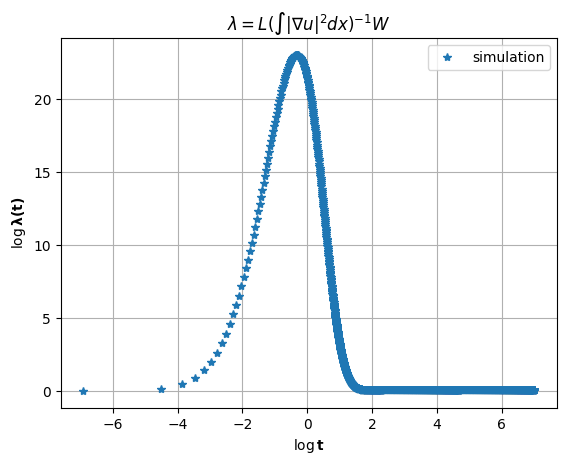

In [245]:
ax.set_yscale("linear")
fig

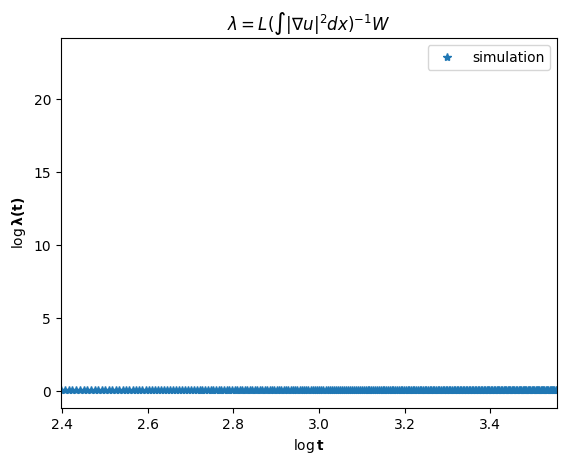

In [246]:
ax.set_xlim(np.log(11),np.log(35))
ax.grid(0)
fig

# Check asymptotic theory
At large times (coarsening established + $\lambda_{DW}>>W\int (1-u^2_{1D})d\xi$)

$$\lambda ^{-2} \simeq [\frac{1}{DW}\int (\partial_{\xi} u_{1D})^2 d\xi] \lambda_{DW}^{-1}$$
where $D=2$ is the dimension and $W$ is the prefactor of the laplacian, that we set $W=1$.

More precisely, when coarsening is established
$$\log \lambda = \frac12\log(\frac{I_1}{DW(2\pi)^2})-\frac12\log(\lambda_{DW}-W\int (1-u^2_{1D})d\xi)$$

/tmp/ipykernel_19260/1912762345.py:8: RuntimeWarning: invalid value encountered in log
  y = -0.5*np.log(prefactor)*np.ones(len(lamDW)-imin-1) + 0.5*np.log(lamDW[imin:len(lamDW)-1] - W*I2*np.ones(len(lamDW)-imin-1))


(0.0, 10.0)

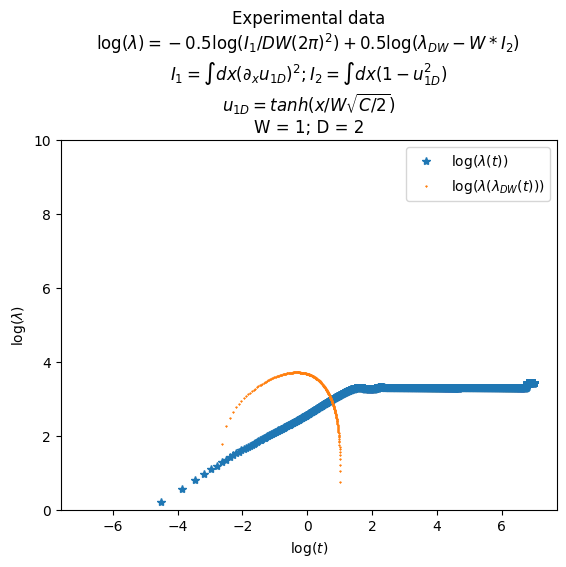

In [247]:
I1 = 2*np.sqrt(2)/3
I2 = 2*np.sqrt(2)
W = 1
D = 2
imin = 2
prefactor = I1/((2*np.pi)**2*W*D)

y = -0.5*np.log(prefactor)*np.ones(len(lamDW)-imin-1) + 0.5*np.log(lamDW[imin:len(lamDW)-1] - W*I2*np.ones(len(lamDW)-imin-1))

f, ax = plt.subplots()
title = "Experimental data\n"
title = title + "$\log(\lambda) = -0.5\log(I_1/DW(2\pi)^2) + 0.5\log(\lambda_{DW}-W*I_2)$ \n"
title = title + "$I_1 = \int dx (\partial_{x} u_{1D})^2; I_2 = \int dx (1-u_{1D}^2)$ \n"
title = title + "$u_{1D} = tanh(x/W\sqrt{C/2})$\n"
title = title + "W = 1; D = 2"
ax.set_xscale("linear")
ax.set_yscale("linear")
ax.plot(log_tt, log_lam,'*', label="$\log(\lambda(t))$")
ax.plot(log_tt[imin:len(lamDW)-1], y,'*', label="$\log(\lambda(\lambda_{DW}(t)))$", ms="1")
ax.set_xlabel("$\log(t)$")
ax.set_ylabel("$\log(\lambda)$")
ax.legend()
ax.set_title(title)
ax.set_ylim(0,10)